In [19]:
# Importing all the modules required
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score
# Saving all the training data in dataframe

matchData = pd.read_csv('./training_dataset/IPL_Matches_Result_2008_2022.csv')
ballData = pd.read_csv('./training_dataset/IPL_Ball_by_Ball_2008_2022.csv')

In [20]:
nulls = matchData["ID"][matchData["WinningTeam"]=="NA"]
print(type(matchData["WinningTeam"]))
print((nulls.dtype))

<class 'pandas.core.series.Series'>
int64


In [21]:
# Function to get team batting and bowling from dataset
def  getTeamBatAndBowl(tossWinner,tossDecision,teamsList):
    teams = list()
    team1 = teamsList[0]
    team2 = teamsList[1]
    if tossDecision == "bat":
        teams.append(tossWinner)
        teams.append(team2) if tossWinner == team1 else teams.append(team1)
    else: 
        teams.append(team2) if tossWinner == team2 else teams.append(teams[0])
        teams.append(tossWinner)
    return teams

In [22]:
# Making a dataframe of average six over score for all teams
def getTeamAvg(teamsList):
    
    teamAverages = dict()

    teamAverageScores = pd.DataFrame(columns = ["Team_Name","Average_Score"])
    for team in teamsList:
        teamAverages[team] = scoresData[""][scoresData["Team1(TS)"]==team].mean()
    
    return teamAverages

In [23]:
# Venue Average Scores
def getVenueAvg(venueList):
    venueAverages = dict()
    for venue in venueList:
        venueAverages[venue[0:20]] = (scoresData[["PPS1","PPS2"]][scoresData["Venue"]==venue].mean().mean())

    return venueAverages

In [24]:
# Getting Batters list from the batter String
def getBatters(batters):
    battersList = list(batters.split(','))
    actualList = list()
    for batter in battersList:
        batter = batter.strip()
        actualList.append(batter)
    return actualList
    

In [25]:
# Getting Bowlers List from the bowler String
def getBowlers(bowlers):
    bowlerList = list(bowlers.split(","))
    actualList = list()
    for bowler in bowlers:
        bowler = bowler.strip()
        actualList.append(bowler)
    return actualList

In [26]:
# Getting Average and Strike Rate for each Batsman

batterData = pd.DataFrame(columns=["BatterName","TotalRuns","TotalBalls","StrikeRate"])
i=0
end = int(734049)
batters = ballData["batter"][(ballData["overs"] <6 ) & (ballData["ID"] > end )].drop_duplicates()
playerList = batters.values
while i<len(batters):
    batterName = playerList[i]
    batterData.loc[i,"BatterName"] = batterName

    runs = ballData["batsman_run"][(ballData["batter"] == batterName) & (ballData["overs"] <6 )].sum() 
    batterData.loc[i,"TotalRuns"] = runs

    ballsFaced = len(ballData[(ballData["batter"] == batterName) & (ballData["overs"] <6 )])
    batterData.loc[i,"TotalBalls"] = ballsFaced

    strikeRate = float(runs/ballsFaced)*100
    batterData.loc[i,"StrikeRate"] = strikeRate
    i+=1   
batterData.to_csv("Batter.csv")


In [27]:
# Getting Economies of bowlers from dataset with
bowlerData = pd.DataFrame(columns=["BowlerName","RunsGiven","BallsBowled","Economy"])

i=0
end = int(734049)
bowlers = ballData["bowler"][(ballData["overs"] <6 ) & (ballData["ID"] > end )].drop_duplicates()
bowlerList = bowlers.values
while i<len(bowlers):
    bowlerName = bowlerList[i]
    bowlerData.loc[i,"BowlerName"] = bowlerName

    runsGiven = ballData["total_run"][(ballData["bowler"] == bowlerName) & (ballData["overs"] <6 )].sum() 
    bowlerData.loc[i,"RunsGiven"] = runsGiven

    ballsBowled = len(ballData[(ballData["bowler"] == bowlerName) & (ballData["overs"] <6 )])
    bowlerData.loc[i,"BallsBowled"] = ballsBowled

    economy = (runsGiven/ballsBowled)*6
    bowlerData.loc[i,"Economy"] = economy
    i+=1   
# print(bowlerData["Economy"].mean())
bowlerNames = list(bowlerData.loc[:,"BowlerName"])
bowlerEcon = list(bowlerData.loc[:,"Economy"])
bowlerDict = dict(zip(bowlerNames, bowlerEcon))
# print(bowlerDict)
bowlerData.to_csv("Bowler.csv")
# print(bowlerData[bowlerData["BallsBowled"]>500].min())

In [28]:
# Venue Average Dictionary
venueAvg = {'Narendra Modi Stadiu': 46.07142857142857, 'Eden Gardens, Kolkat': 58.25, 'Wankhede Stadium, Mu': 45.177419354838705, 'Brabourne Stadium, M': 53.147058823529406, 'Dr DY Patil Sports A': 42.32352941176471, 'Maharashtra Cricket ': 46.79545454545455, 'Dubai International ': 45.25, 'Sharjah Cricket Stad': 45.535714285714285, 'Zayed Cricket Stadiu': 50.5, 'Arun Jaitley Stadium': 50.67857142857143, 'MA Chidambaram Stadi': 47.11458333333333, 'Sheikh Zayed Stadium': 43.672413793103445, 'Rajiv Gandhi Interna': 44.06122448979592, 'Dr. Y.S. Rajasekhara': 40.96153846153846, 'Punjab Cricket Assoc': 47.099999999999994, 'Wankhede Stadium': 45.60958904109589, 'M.Chinnaswamy Stadiu': 49.43333333333334, 'Eden Gardens': 46.26623376623377, 'Sawai Mansingh Stadi': 45.04255319148936, 'Holkar Cricket Stadi': 51.72222222222222, 'M Chinnaswamy Stadiu': 44.65384615384616, 'Feroz Shah Kotla': 46.7, 'Green Park': 55.0, 'Saurashtra Cricket A': 55.3, 'Shaheed Veer Narayan': 38.33333333333333, 'JSCA International S': 38.785714285714285, 'Brabourne Stadium': 51.349999999999994, 'Sardar Patel Stadium': 46.958333333333336, 'Barabati Stadium': 43.57142857142857, 'Subrata Roy Sahara S': 42.4375, 'Himachal Pradesh Cri': 40.55555555555556, 'Nehru Stadium': 39.8, 'Vidarbha Cricket Ass': 44.16666666666667, 'New Wanderers Stadiu': 41.875, 'SuperSport Park': 45.25, 'Kingsmead': 45.93333333333334, 'OUTsurance Oval': 33.5, "St George's Park": 44.785714285714285, 'De Beers Diamond Ova': 40.0, 'Buffalo Park': 39.5, 'Newlands': 40.07142857142857}
#Default Case
venueMean = float(45.44489566204394)
venueAvg["Average"] = venueMean
venueAvg.setdefault("Average")

# Team Average Dictionary
teamAverages = {'Rajasthan Royals': 45.39325842696629, 'Royal Challengers Bangalore': 45.55555555555556, 'Sunrisers Hyderabad': 43.91304347826087, 'Delhi Capitals': 46.58620689655172, 'Chennai Super Kings': 45.3963963963964, 'Gujarat Titans': 42.714285714285715, 'Lucknow Super Giants': 44.875, 'Kolkata Knight Riders': 44.40952380952381, 'Punjab Kings': 47.77777777777778, 'Mumbai Indians': 45.214285714285715, 'Kings XI Punjab': 45.71739130434783, 'Delhi Daredevils': 45.63529411764706, 'Rising Pune Supergiant': 50.714285714285715, 'Gujarat Lions': 48.4375, 'Rising Pune Supergiants': 42.142857142857146, 'Pune Warriors': 39.0, 'Deccan Chargers': 42.8974358974359, 'Kochi Tuskers Kerala': 40.857142857142854}
#Default Case
teamMean = float(44.84651337796224)
teamAverages["Average"] = teamMean
teamAverages.setdefault("Average")
# Batter Average Dictionary
battersData = dict({'YBK Jaiswal': 148.71794871794873, 'JC Buttler': 154.30839002267572, 'SV Samson': 145.632183908046, 'WP Saha': 138.98531375166888, 'Shubman Gill': 130.89214380825567, 'MS Wade': 119.41747572815532, 'HH Pandya': 122.80701754385966, 'V Kohli': 129.1866028708134, 'F du Plessis': 138.73417721518987, 'RM Patidar': 133.33333333333331, 'Q de Kock': 140.21823850350742, 'KL Rahul': 138.40856924254018, 'M Vohra': 133.51351351351352, 'DJ Hooda': 124.7191011235955, 'PK Garg': 126.3157894736842, 'Abhishek Sharma': 141.12554112554113, 'RA Tripathi': 156.00706713780917, 'JM Bairstow': 153.38809034907598, 'S Dhawan': 132.04066265060243, 'M Shahrukh Khan': 158.33333333333331, 'PP Shaw': 151.46124523506987, 'DA Warner': 145.03642987249546, 'MR Marsh': 180.0, 'RR Pant': 165.78947368421052, 'SN Khan': 167.30769230769232, 'Ishan Kishan': 135.44973544973544, 'RG Sharma': 132.63305322128852, 'D Brevis': 158.33333333333331, 'RD Gaikwad': 122.31404958677685, 'DP Conway': 131.57894736842107, 'MM Ali': 155.19480519480518, 'VR Iyer': 126.26262626262626, 'N Rana': 138.125, 'A Tomar': 50.0, 'SS Iyer': 126.11386138613861, 'Lalit Yadav': 90.0, 'PBB Rajapaksa': 253.125, 'LS Livingstone': 188.88888888888889, 'A Badoni': 28.57142857142857, 'KH Pandya': 259.25925925925924, 'AM Rahane': 123.02667392487751, 'KS Williamson': 117.29166666666666, 'MK Lomror': 117.85714285714286, 'GJ Maxwell': 171.37546468401487, 'RV Uthappa': 138.6564525633471, 'AT Rayudu': 128.13333333333335, 'MS Dhoni': 138.46153846153845, 'S Dube': 171.42857142857142, 'DR Sams': 14.285714285714285, 'Tilak Varma': 170.37037037037038, 'T Stubbs': 0.0, 'HR Shokeen': 20.0, 'R Ashwin': 114.28571428571428, 'KS Bharat': 140.98360655737704, 'KS Sharma': 100.0, 'Ramandeep Singh': 100.0, 'AK Markram': 141.66666666666669, 'B Indrajith': 75.0, 'AJ Finch': 125.54479418886197, 'RK Singh': 242.85714285714283, 'Mandeep Singh': 125.66844919786095, 'B Sai Sudharsan': 137.03703703703704, 'D Padikkal': 127.1880819366853, 'SA Yadav': 162.17228464419475, 'MA Agarwal': 128.57142857142858, 'DJ Mitchell': 80.0, 'MJ Santner': 74.07407407407408, 'MK Pandey': 132.86290322580646, 'Anuj Rawat': 101.14942528735634, 'SS Prabhudessai': 161.53846153846155, 'Shahbaz Ahmed': 126.66666666666666, 'SW Billings': 147.0, 'SP Narine': 172.0, 'JM Sharma': 1400.0, 'V Shankar': 70.83333333333334, 'A Manohar': 108.33333333333333, 'DA Miller': 145.45454545454547, 'P Simran Singh': 104.76190476190477, 'K Gowtham': 133.33333333333331, 'JO Holder': 72.22222222222221, 'E Lewis': 144.96644295302013, 'RA Jadeja': 160.41666666666669, 'TL Seifert': 114.28571428571428, 'Anmolpreet Singh': 116.66666666666667, 'RA Bawa': 100.0, 'SE Rutherford': 41.66666666666667, 'DJ Willey': 75.0, 'N Pooran': 170.27027027027026, 'MP Stoinis': 141.83673469387753, 'AR Patel': 286.6666666666667, 'SPD Smith': 149.42263279445726, 'JJ Roy': 122.28571428571429, 'CH Gayle': 144.13830361966504, 'GD Phillips': 100.0, 'SK Raina': 154.79338842975207, 'SS Tiwary': 138.95348837209303, 'AB de Villiers': 151.11111111111111, 'EJG Morgan': 120.10050251256281, 'DT Christian': 62.5, 'DJ Malan': 150.0, 'Virat Singh': 50.0, 'Washington Sundar': 69.23076923076923, 'AD Russell': 329.4117647058823, 'BA Stokes': 142.7027027027027, 'CA Lynn': 158.22784810126583, 'SP Goswami': 102.27272727272727, 'KA Pollard': 151.85185185185185, 'KD Karthik': 140.57971014492753, 'T Banton': 81.81818181818183, 'M Vijay': 120.83333333333333, 'SR Watson': 128.1733746130031, 'SM Curran': 130.18867924528303, 'R Parag': 27.27272727272727, 'R Tewatia': 114.28571428571428, 'N Jagadeesan': 100.0, 'SO Hetmyer': 109.43396226415094, 'KM Jadhav': 128.91566265060243, 'Abdul Samad': 100.0, 'JR Philippe': 107.01754385964912, 'KK Nair': 141.1904761904762, 'C Munro': 151.08695652173913, 'MJ Guptill': 149.04458598726114, 'PA Patel': 126.25766871165645, 'Gurkeerat Singh': 123.07692307692308, 'S Gopal': 75.0, 'Mohammad Nabi': 300.0, 'H Klaasen': 92.85714285714286, 'P Negi': 83.33333333333334, 'Navdeep Saini': 0.0, 'AD Nath': 108.33333333333333, 'JL Denly': 0.0, 'SD Lad': 115.38461538461537, 'NS Naik': 41.17647058823529, 'CA Ingram': 105.55555555555556, 'Shakib Al Hasan': 121.05263157894737, 'MK Tiwary': 125.43103448275863, 'Harbhajan Singh': 135.1851851851852, 'JC Archer': 0.0, 'AD Hales': 145.1219512195122, 'DJM Short': 90.47619047619048, 'BB McCullum': 136.61971830985914, 'JP Duminy': 119.19999999999999, 'YK Pathan': 184.765625, 'G Gambhir': 130.53984575835474, 'RK Bhui': 0.0, 'Yuvraj Singh': 133.50253807106597, 'CH Morris': 271.42857142857144, 'LMP Simmons': 125.62500000000001, 'IR Jaggi': 78.37837837837837, 'Vishnu Vinod': 47.61904761904761, 'SE Marsh': 132.40371845949534, 'DR Smith': 136.09172482552344, 'MC Henriques': 173.61111111111111, 'HM Amla': 136.40776699029126, 'TM Head': 94.11764705882352, 'CJ Anderson': 101.5625, 'MN Samuels': 53.84615384615385, 'PJ Cummins': 100.0, 'SP Jackson': 111.11111111111111, 'STR Binny': 136.0, 'AP Tare': 113.55140186915888, 'K Rabada': 75.0, 'C de Grandhomme': 50.0, 'MJ McClenaghan': 0.0, 'ER Dwivedi': 83.33333333333334, 'Sachin Baby': 0.0, 'NV Ojha': 107.55467196819086, 'UT Khawaja': 139.24050632911394, 'GJ Bailey': 122.90076335877862, 'PP Chawla': 123.07692307692308, 'UBT Chand': 110.06711409395973, 'KP Pietersen': 156.14617940199335, 'MEK Hussey': 115.67635903919088, 'NJ Maddinson': 95.23809523809523, 'V Sehwag': 153.8793103448276, 'GH Vihari': 82.6086956521739, 'MS Bisla': 113.26086956521739, 'RR Rossouw': 91.30434782608695, 'JP Faulkner': 70.0, 'DJ Bravo': 128.44827586206898, 'CM Gautam': 117.1875, 'JA Morkel': 200.0})
#Default Case
averageStrikeRate = float(123.92799513109729)
battersData["Average"] = averageStrikeRate
battersData.setdefault("Average")
# Bowler Average Economy Dictionary
bowlersData = {'Mohammed Shami': 7.413024085637823, 'Yash Dayal': 9.130434782608695, 'LH Ferguson': 7.873303167420815, 'Rashid Khan': 7.894736842105264, 'TA Boult': 7.036011080332409, 'M Prasidh Krishna': 7.731182795698924, 'YS Chahal': 8.010230179028135, 'Mohammed Siraj': 8.493506493506493, 'JR Hazlewood': 7.3831775700934585, 'GJ Maxwell': 8.756756756756756, 'Shahbaz Ahmed': 8.592592592592592, 'Mohsin Khan': 5.287128712871287, 'PVD Chameera': 7.973684210526316, 'KH Pandya': 7.383378016085791, 'Avesh Khan': 8.044692737430168, 'AS Joseph': 9.675, 'R Ashwin': 6.529898804047838, 'LS Livingstone': 5.0, 'Arshdeep Singh': 7.7377049180327875, 'K Rabada': 7.897350993377483, 'NT Ellis': 6.774193548387098, 'B Kumar': 5.966777408637874, 'Washington Sundar': 7.289398280802292, 'Fazalhaq Farooqi': 5.4375, 'J Suchith': 8.32, 'DR Sams': 6.6875, 'HR Shokeen': 6.5, 'JJ Bumrah': 6.643749999999999, 'KK Ahmed': 7.954545454545454, 'A Nortje': 7.706070287539936, 'SN Thakur': 8.402214022140221, 'MR Marsh': 8.928571428571429, 'Mukesh Choudhary': 8.17910447761194, 'Simarjeet Singh': 8.106382978723403, 'S Kaul': 9.0, 'HH Pandya': 8.325991189427313, 'UT Yadav': 7.486404833836858, 'TG Southee': 7.636363636363637, 'SP Narine': 6.560093348891481, 'CV Varun': 6.963730569948186, 'JO Holder': 8.54054054054054, 'K Gowtham': 8.186666666666666, 'RP Meredith': 7.840909090909092, 'R Sanjay Yadav': 8.0, 'T Natarajan': 8.0, 'Harpreet Brar': 9.954545454545455, 'R Dhawan': 7.6, 'Lalit Yadav': 7.1020408163265305, 'MJ Santner': 8.148148148148149, 'M Jansen': 7.5600000000000005, 'AD Russell': 7.894736842105264, 'C Sakariya': 6.582857142857144, 'AR Patel': 7.41743119266055, 'M Ashwin': 8.936170212765957, 'K Kartikeya': 16.0, 'PJ Cummins': 7.991091314031181, 'M Theekshana': 8.10989010989011, 'Kartik Tyagi': 9.347826086956522, 'Shivam Mavi': 8.122186495176848, 'AS Roy': 8.0, 'Harshit Rana': 11.5, 'KR Sen': 7.846153846153847, 'Sandeep Sharma': 6.789250353606789, 'SA Abbott': 10.64516129032258, 'Umran Malik': 15.461538461538463, 'PWH de Silva': 11.2, 'PJ Sangwan': 8.248021108179419, 'Mustafizur Rahman': 6.611898016997167, 'JD Unadkat': 7.449720670391061, 'HV Patel': 8.516778523489933, 'OC McCoy': 7.0, 'VG Arora': 7.875, 'CJ Jordan': 9.196721311475411, 'Tilak Varma': 7.0, 'TS Mills': 8.153846153846153, 'FA Allen': 10.105263157894736, 'Ravi Bishnoi': 7.379310344827585, 'JDS Neesham': 10.864864864864865, 'Basil Thampi': 9.233532934131738, 'Akash Deep': 8.70967741935484, 'MM Ali': 5.428571428571429, 'Rasikh Salam': 6.9375, 'DJ Willey': 7.142857142857142, 'AJ Tye': 7.878787878787879, 'R Shepherd': 7.5, 'DJ Bravo': 7.506172839506173, 'Navdeep Saini': 8.13986013986014, 'OF Smith': 7.0, 'TU Deshpande': 9.352941176470589, 'VR Aaron': 8.388206388206388, 'KL Nagarkoti': 8.70967741935484, 'AF Milne': 9.386138613861387, 'Shakib Al Hasan': 7.52967032967033, 'DL Chahar': 7.5281954887218046, 'GHS Garton': 9.818181818181818, 'J Yadav': 7.411764705882353, 'NM Coulter-Nile': 6.9815303430079165, 'IC Porel': 12.0, 'DJ Hooda': 7.783783783783784, 'CH Morris': 7.531380753138075, 'KA Jamieson': 8.36697247706422, 'DT Christian': 7.917525773195877, 'MK Lomror': 5.5, 'AK Markram': 5.684210526315789, 'SM Curran': 7.633136094674557, 'N Rana': 3.473684210526316, 'S Gopal': 7.947368421052631, 'K Yadav': 13.0, 'S Sandeep Warrier': 7.875, 'Akash Singh': 9.0, 'Mohammad Nabi': 6.279999999999999, 'PP Chawla': 7.5780821917808225, 'I Sharma': 7.03574144486692, 'MP Stoinis': 9.327272727272726, 'DS Kulkarni': 7.419540229885058, 'L Ngidi': 7.147058823529411, 'MC Henriques': 8.0, 'Abhishek Sharma': 6.947368421052632, 'RD Chahar': 7.701492537313433, 'KW Richardson': 6.758620689655173, 'A Mishra': 7.300699300699302, 'CR Woakes': 8.840236686390533, 'LI Meriwala': 12.923076923076923, 'Jalaj S Saxena': 10.0, 'JA Richardson': 9.84, 'Harbhajan Singh': 7.065989847715736, 'Mujeeb Ur Rahman': 7.056338028169014, 'S Nadeem': 8.01290322580645, 'TK Curran': 9.136363636363637, 'JL Pattinson': 8.355140186915888, 'I Udana': 10.94736842105263, 'Monu Kumar': 5.25, 'JC Archer': 5.273239436619718, 'BA Stokes': 8.821621621621622, 'SS Cottrell': 7.043478260869566, 'AS Rajpoot': 8.79020979020979, 'V Shankar': 7.636363636363637, 'DW Steyn': 6.170711297071129, 'CJ Green': 8.0, 'Imran Tahir': 9.272727272727273, 'MM Sharma': 7.862068965517241, 'MJ McClenaghan': 7.605263157894737, 'SL Malinga': 6.237113402061857, 'HF Gurney': 5.657142857142857, 'O Thomas': 9.405405405405405, 'IS Sodhi': 8.5, 'BB Sran': 8.851239669421489, 'R Parag': 10.0, 'K Khejroliya': 12.333333333333332, 'S Lamichhane': 8.666666666666666, 'CR Brathwaite': 7.5, 'Y Prithvi Raj': 15.23076923076923, 'STR Binny': 7.2749999999999995, 'KC Cariappa': 10.54054054054054, 'GC Viljoen': 8.91891891891892, 'KMA Paul': 13.714285714285714, 'JP Behrendorff': 9.225000000000001, 'RA Jadeja': 8.266666666666666, 'SC Kuggeleijn': 11.0, 'LE Plunkett': 9.818181818181818, 'B Laughlin': 9.891891891891891, 'CJ Dala': 14.57142857142857, 'JPR Scantlebury-Searles': 11.142857142857142, 'Ankit Sharma': 6.2465753424657535, 'MG Johnson': 7.598173515981735, 'KM Asif': 8.307692307692307, 'SR Watson': 6.9839449541284395, 'JP Duminy': 7.481927710843373, 'R Tewatia': 7.5, 'Kuldeep Yadav': 7.034482758620689, 'P Negi': 9.142857142857142, 'B Stanlake': 7.4831460674157295, 'A Dananjaya': 12.0, 'BCJ Cutting': 9.272727272727273, 'R Vinay Kumar': 7.246753246753247, 'KV Sharma': 7.1625000000000005, 'Bipul Sharma': 6.16, 'Z Khan': 6.650817236255572, 'C de Grandhomme': 5.571428571428571, 'P Kumar': 6.624847746650426, 'JP Faulkner': 7.790575916230367, 'MJ Henry': 12.0, 'DR Smith': 11.014925373134329, 'A Choudhary': 7.45945945945946, 'S Badree': 7.3500000000000005, 'S Aravind': 7.371040723981901, 'A Nehra': 7.358090185676393, 'YK Pathan': 6.554347826086957, 'IK Pathan': 6.914405010438413, 'Ankit Soni': 3.0, 'SK Raina': 7.545454545454545, 'Anureet Singh': 7.19277108433735, 'CJ Anderson': 9.81081081081081, 'NB Singh': 4.32, 'SS Agarwal': 11.0, 'MM Patel': 7.02089552238806, 'SB Jakati': 8.597938144329897, 'AB Dinda': 7.087719298245615, 'Iqbal Abdulla': 6.2785714285714285, 'Tejas Baroka': 8.0, 'MS Gony': 8.578217821782179, 'S Kaushik': 12.947368421052632, 'CH Gayle': 7.921875, 'M Morkel': 6.933194154488518, 'KS Williamson': 7.0, 'NLTC Perera': 7.351648351648352, 'KJ Abbott': 9.954545454545455, 'M Vijay': 6.857142857142857, 'A Zampa': 7.714285714285715, 'PV Tambe': 8.55, 'RP Singh': 7.00188679245283, 'Parvez Rasool': 9.181818181818182, 'SM Boland': 7.333333333333334, 'JA Morkel': 8.236536430834214, 'P Sahu': 9.428571428571429, 'JW Hastings': 7.692307692307693, 'GB Hogg': 6.612244897959183, 'S Ladda': 9.333333333333334, 'MA Starc': 6.769230769230769, 'D Wiese': 6.095238095238095, 'Azhar Mahmood': 6.608108108108108, 'IC Pandey': 6.959107806691449, 'BE Hendricks': 10.125, 'Gurkeerat Singh': 9.5, 'J Botha': 7.8061224489795915, 'M de Lange': 7.569230769230769, 'AD Mathews': 8.604651162790699, 'GS Sandhu': 7.0, 'RG More': 15.0, 'J Theron': 8.869565217391305, 'DJ Muthuswami': 8.25, 'Karanveer Singh': 13.0, 'AN Ahmed': 7.846153846153847, 'P Suyal': 8.584615384615384}
#Default Case
averageEconomy = float(8.20377313587133)
bowlersData["Average"] = averageStrikeRate
bowlersData.setdefault("Average")

scoresData = pd.DataFrame(columns=["MatchNo","MatchID","Year","Venue","Innings","VenueAvg","TeamBatting","TeamBowling","TeamBattingAvg","Batters","Bowlers","Batter1SR","Batter2SR","Batter3SR","Bowler1E","Bowler2E","Bowler3E","RunsScored","Wickets"])
j = int(0)
mNo = int(0)

while j<len(matchData):
    # 1st Innings 
    matchID = int(matchData.loc[j,"ID"])
    team1 = matchData.loc[j,"Team1"]
    team2 = matchData.loc[j,"Team2"]
    teams = list([team1,team2])
    matchVenue = matchData.loc[j,"Venue"][0:20]
    isPlayed = matchData.loc[j,"WinningTeam"]
    season = matchData.loc[j,"Season"]

    scoresData.loc[j,"MatchNo"] = mNo
    scoresData.loc[j,"MatchID"] = matchID
    scoresData.loc[j,"Year"] = matchData.loc[j,"Season"]
    scoresData.loc[j,"Venue"] = matchVenue
    scoresData.loc[j,"Innings"] = 1
    scoresData.loc[j,"VenueAvg"] = venueAvg[matchVenue] 
    scoresData.loc[j,"TeamBatting"]  = teams[0]
    scoresData.loc[j,"TeamBowling"]  = teams[1]
    scoresData.loc[j,"TeamBattingAvg"] = teamAverages[teams[0]] 

        
        
    try:
        # Batter and Bowler Details

        batters = list(ballData["batter"][(ballData["ID"]==matchID) &  (ballData["overs"]<6) & (ballData["innings"]==1)].drop_duplicates())
        scoresData.loc[j,"Batters"] = batters
        bowlers =  list(ballData["bowler"][(ballData["ID"]==matchID) &  (ballData["overs"]<6) & (ballData["innings"]==1)].drop_duplicates())
        scoresData.loc[j,"Bowlers"] = bowlers

        # BatterStrikeRates
        scoresData.loc[j,'Batter1SR'] =  battersData.get(batters[0]) if battersData.get(batters[0]) is not None else averageStrikeRate
        scoresData.loc[j,'Batter2SR'] =  battersData.get(batters[1]) if battersData.get(batters[1]) is not None else averageStrikeRate
        scoresData.loc[j,'Batter3SR'] =  battersData.get(batters[2]) if len(batters)>2 and battersData.get(batters[2]) is not None else averageStrikeRate

        # BowlerEconomies
        scoresData.loc[j,"Bowler1E"] = bowlersData.get(bowlers[0]) if bowlersData.get(bowlers[0]) is not None else averageEconomy
        scoresData.loc[j,"Bowler2E"] = bowlersData.get(bowlers[1]) if bowlersData.get(bowlers[1]) is not None else averageEconomy
        scoresData.loc[j,"Bowler3E"] = bowlersData.get(bowlers[2]) if len(bowlers)>2 and bowlersData.get(bowlers[2]) is not None else averageEconomy
    except Exception as e:
        # Default Values for things
        print(e)
        scoresData.loc[j,"Batters"] = list()
        scoresData.loc[j,"Bowlers"] = list()
        scoresData.loc[j,'Batter1SR'] =  averageStrikeRate
        scoresData.loc[j,'Batter2SR'] =  averageStrikeRate
        scoresData.loc[j,'Batter3SR'] =  averageStrikeRate
        scoresData.loc[j,"Bowler1E"] = averageEconomy
        scoresData.loc[j,"Bowler2E"] = averageEconomy
        scoresData.loc[j,"Bowler3E"] = averageEconomy


    # Runs and Wickets for the team

    scoresData.loc[j,"RunsScored"] = ballData["total_run"][(ballData["ID"]==matchID) & (ballData["overs"]<6) & (ballData["innings"]==1)].sum()
    scoresData.loc[j,"Wickets"] = ballData["isWicketDelivery"][(ballData["ID"]==matchID) & (ballData["overs"]<6) & (ballData["innings"]==1)].sum()
    
    # 2nd Innings
    j+=1
    scoresData.loc[j,"MatchNo"] = mNo
    scoresData.loc[j,"MatchID"] = matchID
    scoresData.loc[j,"Year"] = season
    scoresData.loc[j,"Venue"] = matchVenue
    scoresData.loc[j,"Innings"] = 2
    scoresData.loc[j,"VenueAvg"] = venueAvg[matchVenue] 
    scoresData.loc[j,"TeamBatting"]  = teams[1]
    scoresData.loc[j,"TeamBowling"]  = teams[0]
    scoresData.loc[j,"TeamBattingAvg"] = teamAverages[teams[1]]


    try:
        # Batter and Bowler Details

        batters = list(ballData["batter"][(ballData["ID"]==matchID) &  (ballData["overs"]<6) & (ballData["innings"]==2)].drop_duplicates())
        scoresData.loc[j,"Batters"] = batters
        bowlers =  list(ballData["bowler"][(ballData["ID"]==matchID) &  (ballData["overs"]<6) & (ballData["innings"]==2)].drop_duplicates())
        scoresData.loc[j,"Bowlers"] = bowlers

        # BatterStrikeRates

        scoresData.loc[j,'Batter1SR'] =  battersData.get(batters[0]) if battersData.get(batters[0]) is not None else averageStrikeRate
        scoresData.loc[j,'Batter2SR'] =  battersData.get(batters[1]) if battersData.get(batters[1]) is not None else averageStrikeRate
        scoresData.loc[j,'Batter3SR'] =  battersData.get(batters[2]) if len(batters)>2 and battersData.get(batters[2]) is not None else averageStrikeRate

        # BowlerEconomies

        scoresData.loc[j,"Bowler1E"] = bowlersData.get(bowlers[0]) if bowlersData.get(bowlers[0]) is not None else averageEconomy
        scoresData.loc[j,"Bowler2E"] = bowlersData.get(bowlers[1]) if bowlersData.get(bowlers[1]) is not None else averageEconomy
        scoresData.loc[j,"Bowler3E"] = bowlersData.get(bowlers[2]) if len(bowlers)>2 and bowlersData.get(bowlers[2]) is not None else averageEconomy

    except  Exception as e:
        print(matchID)
        print(e)
        # Default Values for things
        scoresData.loc[j,"Batters"] = list()
        scoresData.loc[j,"Bowlers"] = list()
        scoresData.loc[j,'Batter1SR'] =  averageStrikeRate
        scoresData.loc[j,'Batter2SR'] =  averageStrikeRate
        scoresData.loc[j,'Batter3SR'] =  averageStrikeRate
        scoresData.loc[j,"Bowler1E"] = averageEconomy
        scoresData.loc[j,"Bowler2E"] = averageEconomy
        scoresData.loc[j,"Bowler3E"] = averageEconomy


    scoresData.loc[j,"RunsScored"] = ballData["total_run"][(ballData["ID"]==matchID) & (ballData["overs"]<6) & (ballData["innings"]==2)].sum()
    scoresData.loc[j,"Wickets"] = ballData["isWicketDelivery"][(ballData["ID"]==matchID) & (ballData["overs"]<6) & (ballData["innings"]==2)].sum()
    j+=1
    mNo+=1

scoresData.to_csv("Results.csv")

829763
list index out of range
501265
list index out of range


In [29]:
print(scoresData.isnull().sum())

MatchNo           0
MatchID           0
Year              0
Venue             0
Innings           0
VenueAvg          0
TeamBatting       0
TeamBowling       0
TeamBattingAvg    0
Batters           0
Bowlers           0
Batter1SR         0
Batter2SR         0
Batter3SR         0
Bowler1E          0
Bowler2E          0
Bowler3E          0
RunsScored        0
Wickets           0
dtype: int64


In [30]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to scale
columns_to_scale  = ["VenueAvg","TeamBattingAvg","Batter1SR","Batter2SR","Batter3SR","Bowler1E","Bowler2E","Bowler3E"]
df = scoresData
# Fit the scaler to the selected columns
scaler.fit(df[columns_to_scale])

# Transform the data using the scaler
scaled_data = scaler.transform(df[columns_to_scale])

# Replace the original columns with the scaled values
df[columns_to_scale] = scaled_data

df.to_csv("ScaledData.csv")

In [31]:
# scoresData = df
X = scoresData[["VenueAvg","TeamBattingAvg","Batter1SR","Batter2SR","Batter3SR","Bowler1E","Bowler2E","Bowler3E"]]
y = scoresData[["RunsScored"]]

# Making multi-output Regression

# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# creating a regression model

model = LinearRegression()

# fitting the model
model.fit(X_train, y_train)
  
# # making predictions

predictions = model.predict(X_train)
pred = pd.DataFrame(columns=["TeamBatting","TeamBowling","Venue","Prediction","Actual","Error"])

i=0
while i<len(X_train):
    pred.loc[i,"TeamBatting"] = scoresData.loc[i,"TeamBatting"]
    pred.loc[i,"TeamBowling"] = scoresData.loc[i,"TeamBowling"]
    pred.loc[i,"Venue"] = scoresData.loc[i,"Venue"]
    pred.loc[i,"Actual"] = scoresData.loc[i,"RunsScored"]
    pred.loc[i,"Prediction"] = predictions[i][0]
    if pred.loc[i,"Actual"]!=0:
        pred.loc[i,"Error"] = abs(((pred.loc[i,"Actual"]-pred.loc[i,"Prediction"])/pred.loc[i,"Actual"])*100)
    else :
        pred.loc[i,"Error"] = 23.676913752984913
    i+=1
    # pred.loc[i,"Team1"] = scoresData.loc[i,"VenueAvg"]
pred.to_csv("PredictionsWithER.csv")
print(pred["Error"].mean())
print(pred[pred["Error"]==pred["Error"].max()])
print(pred[pred["Error"]==pred["Error"].min()])


23.73060637382649
          TeamBatting          TeamBowling                 Venue Prediction  \
444  Delhi Daredevils  Chennai Super Kings  Shaheed Veer Narayan  44.509947   

    Actual       Error  
444     16  178.187171  
        TeamBatting      TeamBowling                 Venue Prediction Actual  \
413  Mumbai Indians  Kings XI Punjab  Punjab Cricket Assoc  39.998711     40   

        Error  
413  0.003223  


In [32]:
# # scoresData = df
# X = scoresData[["VenueAvg","TeamBattingAvg","Batter1SR","Batter2SR","Batter3SR"]]
# y = scoresData[["RunsScored"]]

# # Making multi-output Regression

# # creating train and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42)

# # creating a regression model

# model = LinearRegression()

# # fitting the model
# model.fit(X_train, y_train)
  
# # # making predictions

# predictions = model.predict(X_train)
# pred = pd.DataFrame(columns=["TeamBatting","TeamBowling","Venue","Prediction","Actual","Error"])

# i=0
# while i<len(X_train):
#     pred.loc[i,"TeamBatting"] = scoresData.loc[i,"TeamBatting"]
#     pred.loc[i,"TeamBowling"] = scoresData.loc[i,"TeamBowling"]
#     pred.loc[i,"Venue"] = scoresData.loc[i,"Venue"]
#     pred.loc[i,"Actual"] = scoresData.loc[i,"RunsScored"]
#     pred.loc[i,"Prediction"] = predictions[i][0]
#     if pred.loc[i,"Actual"]!=0:
#         pred.loc[i,"Error"] = abs(((pred.loc[i,"Actual"]-pred.loc[i,"Prediction"])/pred.loc[i,"Actual"])*100)
#     else :
#         pred.loc[i,"Error"] = 23.676913752984913
#     i+=1
# # Saving the data to csv files
# pred.to_csv("PredictionsWithoutER.csv")
# print(pred["Error"].mean())
# # print(pred[pred["Error"]==pred["Error"].max()])
# # print(pred[pred["Error"]==pred["Error"].min()])


In [38]:

testdf = pd.DataFrame(columns=["VenueAvg","TeamBattingAvg","Batter1SR","Batter2SR","Batter3SR","Bowler1E","Bowler2E","Bowler3E"])
test_data = pd.read_csv("./testfiles/test_file.csv")
print(len(test_data))
for j in range(0,len(test_data)):
    try:
        # Venue and Team Averages
        venue = test_data.loc[j,"venue"].strip()[:20]
        battingTeam = test_data.loc[j,"batting_team"]
        batterString = (test_data.loc[j,"batsmen"])
        batters = list(getBatters(batterString))
        bowlerString = test_data.loc[j,"bowlers"]
        bowlers = list(getBowlers(bowlerString))
        testdf.loc[j,"VenueAvg"] = venueAvg[venue]
        print(venueAvg[venue])
        testdf.loc[j,"TeamBattingAvg"] = teamAverages[battingTeam]
        # BatterStrikeRates
        testdf.loc[j,'Batter1SR'] =  battersData.get(batters[0]) if battersData.get(batters[0]) is not None else averageStrikeRate
        testdf.loc[j,'Batter2SR'] =  battersData.get(batters[1]) if battersData.get(batters[1]) is not None else averageStrikeRate
        testdf.loc[j,'Batter3SR'] =  battersData.get(batters[2]) if len(batters)>2 and battersData.get(batters[2]) is not None else averageStrikeRate
        #BowlerEconomies

        testdf.loc[j,"Bowler1E"] = bowlersData.get(bowlers[0]) if bowlersData.get(bowlers[0]) is not None else averageEconomy
        testdf.loc[j,"Bowler2E"] = bowlersData.get(bowlers[1]) if bowlersData.get(bowlers[1]) is not None else averageEconomy
        testdf.loc[j,"Bowler3E"] = bowlersData.get(bowlers[2]) if len(bowlers)>2 and bowlersData.get(bowlers[2]) is not None else averageEconomy
    except Exception as e:
        print(e.stackTrace())
        # Taking averages for all
        testdf.loc[j,"TeamBattingAvg"] = teamAverages[battingTeam]
        testdf.loc[j,"VenueAvg"] = venueAvg[venue]
        testdf.loc[j,'Batter1SR'] =  averageStrikeRate
        testdf.loc[j,'Batter2SR'] =  averageStrikeRate
        testdf.loc[j,'Batter3SR'] =  averageStrikeRate
        # Average econmoies for bowlers
        scoresData.loc[j,"Bowler1E"] = averageEconomy
        scoresData.loc[j,"Bowler2E"] = averageEconomy
        scoresData.loc[j,"Bowler3E"] = averageEconomy
print(testdf)

testdf.to_csv("TEST.csv")
matchPred = model.predict(testdf)
print(matchPred)
# testdf["Prediction"] = model.predict(testdf)

# print(testdf)

4
44.06122448979592
44.06122448979592
47.11458333333333
47.11458333333333
    VenueAvg TeamBattingAvg   Batter1SR   Batter2SR   Batter3SR  Bowler1E  \
0  44.061224      45.214286  132.633053  135.449735  123.927995  8.203773   
1  44.061224      43.913043  123.927995  128.571429  156.007067  8.203773   
2  47.114583      45.214286  123.927995  123.927995  123.927995  8.203773   
3  47.114583      44.409524  135.185185  123.927995  121.052632  8.203773   

   Bowler2E  Bowler3E  
0  8.203773  8.203773  
1  8.203773  8.203773  
2  8.203773  8.203773  
3  8.203773  8.203773  
[[4812.75002274]
 [4304.84243698]
 [4561.50294431]
 [4746.22960979]]


0      44
1      31
2      52
3      62
4      43
       ..
660    33
661    53
662    33
663    48
664    38
Name: Actual, Length: 665, dtype: object


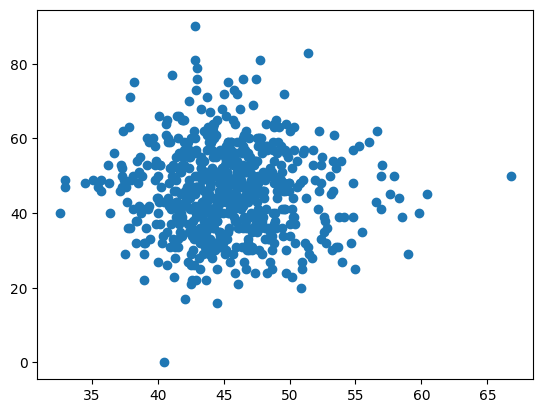

In [34]:
X = np.array(pred["Prediction"].values.reshape(len(pred),1))
Y = pred["Actual"]
plt.scatter(X,Y)
print(pred["Actual"])